<h1>Импорт библиотек

In [3]:
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


# Задача 1.
Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [6]:
def sum_prod(X, V):
    for i in range(len(X)):
        V[i] = np.matmul(X[i], V[i])

    sm = V[0]
    for i in range(1, len(X)):
        sm = np.add(sm, V[i])
    
    return sm

def test_sum_prod():
    # Исходные данные
    X = [
        np.array([[1, 0], [0, 1]]),
        np.array([[0, 1], [1, 0]])
    ]
    
    V = [
        np.array([[1], 
                 [2]]),
        np.array([[3], 
                 [4]])
    ]
    expected = np.array([[5], [5]])

    result = sum_prod(X, V)
    
    assert np.array_equal(result, expected), f"❌Test failed: {result} != {expected}"
    print("✅Test passed!")

# Запуск теста
test_sum_prod()


✅Test passed!


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [12]:
def binarize(M, threshold=0.5):
    for i in range(M.shape[0]):
        for j in range(M.shape[1]):
            M[i, j] = M[i, j] > threshold

def test_binarize():
    M = np.array([[0.2, 0.7], [0.5, 0.9]])
    expected = np.array([[False, True], [False, True]])
    binarize(M)
    np.testing.assert_array_equal(M, expected)
    print("✅Test passed!")

test_binarize()

✅Test passed!


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [40]:
def unique_rows(mat):
    uniques = [None]*mat.shape[0]
    for r in range(mat.shape[0]):
        unique=set()
        for c in range(mat.shape[1]):
            unique.add(mat[r,c])
        uniques[r] = unique
    return uniques

def unique_columns(mat):
    uniques = [None]*mat.shape[1]
    for c in range(mat.shape[1]):
        unique=set()
        for r in range(mat.shape[0]):
            unique.add(mat[r,c])
        uniques[c] = unique
    return uniques

def test_unique_rows():
    mat = np.array([[1, 2, 3],
                    [4, 5, 6],
                    [1, 2, 3]])
    expected = [{1, 2, 3}, {4, 5, 6}, {1, 2, 3}]
    result = unique_rows(mat)
    if result == expected:
        print("✅Test passed!")
    else:
        print(f"❌Test failed: {result} != {expected}")

def test_unique_columns():
    mat = np.array([[1, 2, 3],
                    [4, 5, 6],
                    [1, 2, 3]])
    expected = [{1, 4}, {2, 5}, {3, 6}]
    result = unique_columns(mat)
    if result == expected:
        print("✅Test passed!")
    else:
        print(f"❌Test failed: {result} != {expected}")

test_unique_rows()
test_unique_columns()


✅Test passed!
✅Test passed!


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

Мат. ожидание по строкам: [-0.82749631 -0.30489267 -0.2909986  -0.25005993  0.83342217]
Дисперсия по строкам: [0.11614032 1.17873648 3.63898174 0.29299461 0.76808885]
Мат. ожидание по столбцам: [-0.33013017 -0.74856053 -0.3157284   0.72239883]
Дисперсия по столбцам: [0.88411139 0.46338844 1.59355789 1.85963247]


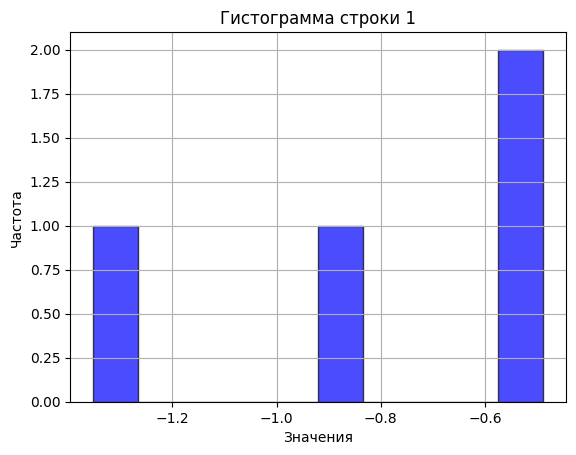

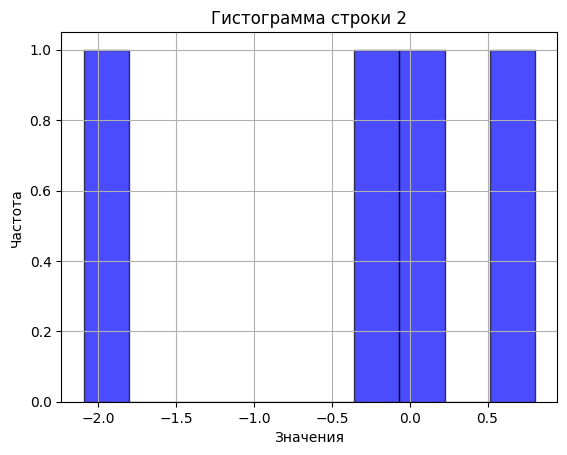

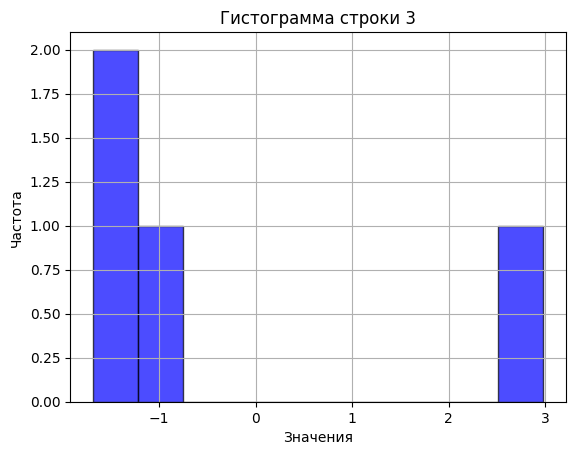

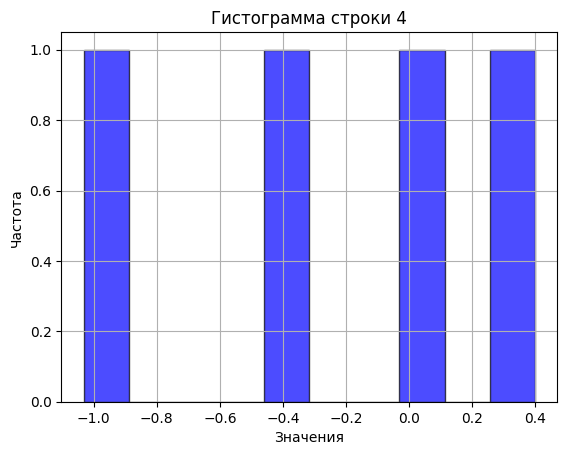

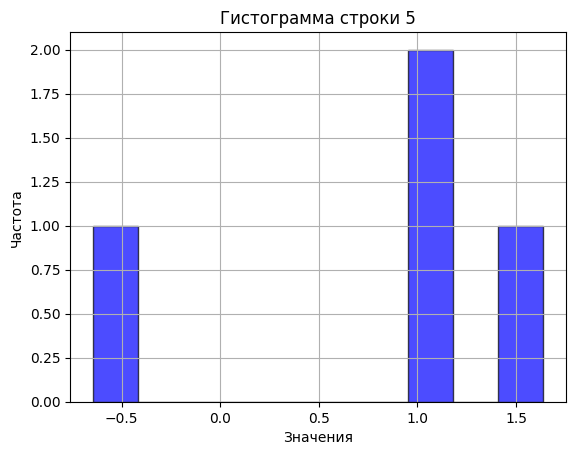

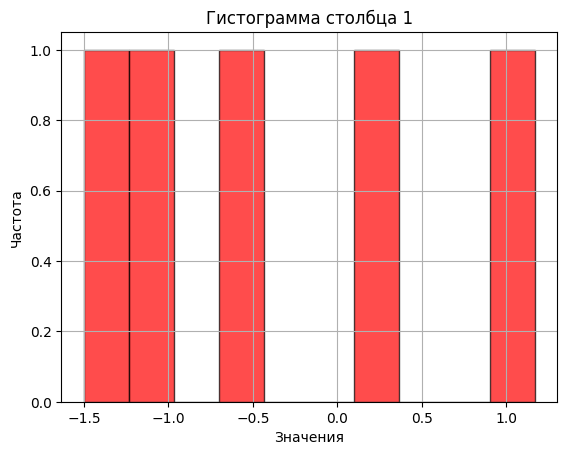

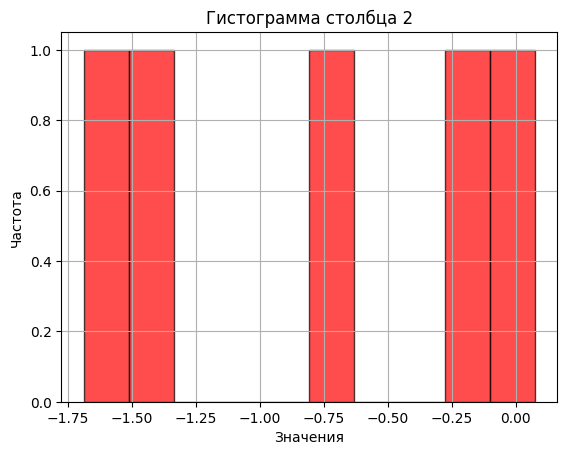

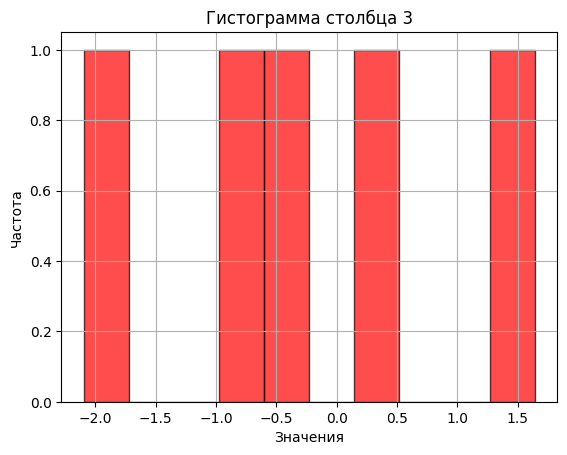

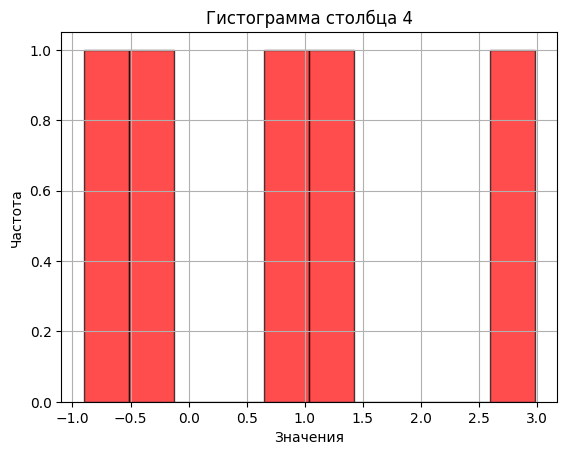

In [41]:
import numpy as np
import matplotlib.pyplot as plt

def generate_matrix(m, n, mean=0, std=1):
    return np.random.normal(loc=mean, scale=std, size=(m, n))

def compute_statistics(matrix):
    row_means = matrix.mean(axis=1)
    row_vars = matrix.var(axis=1)
    col_means = matrix.mean(axis=0)
    col_vars = matrix.var(axis=0)
    
    return row_means, row_vars, col_means, col_vars

def plot_histograms(matrix):
    m, n = matrix.shape
    
    for i in range(m):
        plt.figure()
        plt.hist(matrix[i, :], bins=10, alpha=0.7, color='b', edgecolor='black')
        plt.title(f'Гистограмма строки {i+1}')
        plt.xlabel('Значения')
        plt.ylabel('Частота')
        plt.grid()
        plt.show()
    
    for j in range(n):
        plt.figure()
        plt.hist(matrix[:, j], bins=10, alpha=0.7, color='r', edgecolor='black')
        plt.title(f'Гистограмма столбца {j+1}')
        plt.xlabel('Значения')
        plt.ylabel('Частота')
        plt.grid()
        plt.show()

m, n = 5, 4
matrix = generate_matrix(m, n)
row_means, row_vars, col_means, col_vars = compute_statistics(matrix)

print("Мат. ожидание по строкам:", row_means)
print("Дисперсия по строкам:", row_vars)
print("Мат. ожидание по столбцам:", col_means)
print("Дисперсия по столбцам:", col_vars)

plot_histograms(matrix)


<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [45]:
def chess(m, n, a, b):
    """
    Создаёт матрицу m x n, заполненную в шахматном порядке числами a и b.
    """
    return [[a if (i + j) % 2 == 0 else b for j in range(n)] for i in range(m)]

def test_chess():
    assert chess(3, 3, 1, 0) == [[1, 0, 1], [0, 1, 0], [1, 0, 1]]
    assert chess(2, 4, "X", "O") == [["X", "O", "X", "O"], ["O", "X", "O", "X"]]
    assert chess(1, 5, 5, 3) == [[5, 3, 5, 3, 5]]
    assert chess(4, 2, "A", "B") == [["A", "B"], ["B", "A"], ["A", "B"], ["B", "A"]]
    assert chess(1, 1, 42, 99) == [[42]]
    print("✅Tests passed!")


test_chess()


✅Tests passed!


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
</h1>

# $\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

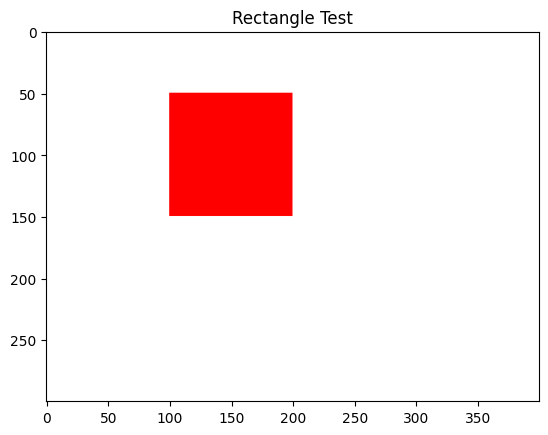

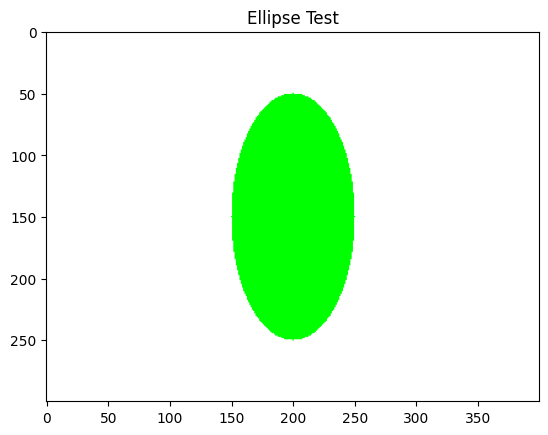

In [47]:
import numpy as np
import matplotlib.pyplot as plt

def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    image = np.zeros((m, n, 3), dtype=int)
    image[:, :] = background_color
    image[a[0]:a[1], b[0]:b[1]] = rectangle_color
    return image

def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    image = np.zeros((m, n, 3), dtype=int)
    image[:, :] = background_color
    y, x = np.ogrid[:m, :n]
    mask = ((x - n // 2)**2 / a**2 + (y - m // 2)**2 / b**2) <= 1
    image[mask] = ellipse_color
    return image

def test_draw_rectangle():
    rect_image = draw_rectangle((50, 150), (100, 200), 300, 400, (255, 0, 0), (255, 255, 255))
    plt.imshow(rect_image)
    plt.title("Rectangle Test")
    plt.show()

def test_draw_ellipse():
    ellipse_image = draw_ellipse(50, 100, 300, 400, (0, 255, 0), (255, 255, 255))
    plt.imshow(ellipse_image)
    plt.title("Ellipse Test")
    plt.show()

test_draw_rectangle()
test_draw_ellipse()


<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

Математическое ожидание: 6.769230769230769
Дисперсия: 7.562130177514793
Стандартное отклонение: 2.7499327587260733
Локальные максимумы: [2, 5, 9]
Локальные минимумы: [4, 7]


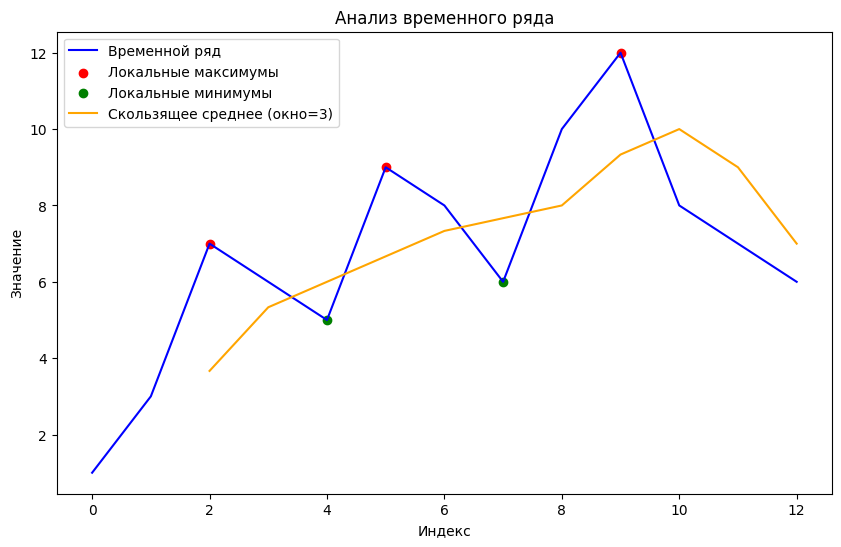

In [49]:
import numpy as np
import matplotlib.pyplot as plt

time_series = np.array([1, 3, 7, 6, 5, 9, 8, 6, 10, 12, 8, 7, 6])

mean = np.mean(time_series)
variance = np.var(time_series)
std_dev = np.std(time_series)

local_maxima = []
local_minima = []

for i in range(1, len(time_series) - 1):
    if time_series[i] > time_series[i - 1] and time_series[i] > time_series[i + 1]:
        local_maxima.append(i)
    elif time_series[i] < time_series[i - 1] and time_series[i] < time_series[i + 1]:
        local_minima.append(i)

def moving_average(arr, window_size):
    return np.convolve(arr, np.ones(window_size)/window_size, mode='valid')

window_size = 3
smoothed_series = moving_average(time_series, window_size)

print(f"Математическое ожидание: {mean}")
print(f"Дисперсия: {variance}")
print(f"Стандартное отклонение: {std_dev}")
print(f"Локальные максимумы: {local_maxima}")
print(f"Локальные минимумы: {local_minima}")

plt.figure(figsize=(10, 6))

plt.plot(time_series, label='Временной ряд', color='blue')
plt.scatter(local_maxima, time_series[local_maxima], color='red', label='Локальные максимумы')
plt.scatter(local_minima, time_series[local_minima], color='green', label='Локальные минимумы')
plt.plot(np.arange(window_size - 1, len(time_series)), smoothed_series, label=f'Скользящее среднее (окно={window_size})', color='orange')

plt.xlabel('Индекс')
plt.ylabel('Значение')
plt.legend()
plt.title('Анализ временного ряда')
plt.show()

<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

One-hot encoding для вектора [0 2 3 0] :
 [[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]


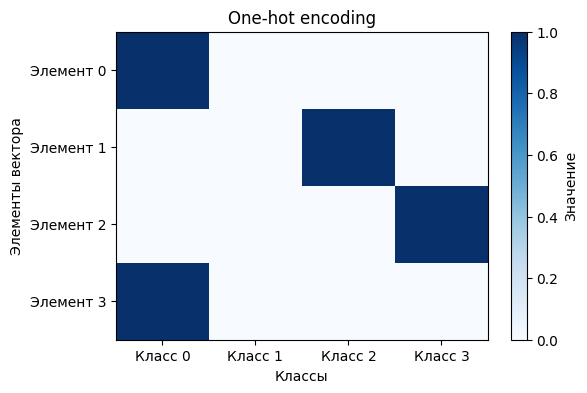

In [53]:
import numpy as np
import matplotlib.pyplot as plt

def one_hot_encoding(labels):
    num_classes = np.max(labels) + 1
    one_hot_encoded = np.eye(num_classes)[labels]
    return one_hot_encoded

labels = np.array([0, 2, 3, 0])
encoded = one_hot_encoding(labels)

print("One-hot encoding для вектора", labels, ":\n", encoded)

plt.figure(figsize=(6, 4))
plt.imshow(encoded, cmap='Blues', aspect='auto')
plt.title("One-hot encoding")
plt.xlabel("Классы")
plt.ylabel("Элементы вектора")
plt.xticks(np.arange(encoded.shape[1]), [f"Класс {i}" for i in range(encoded.shape[1])])
plt.yticks(np.arange(encoded.shape[0]), [f"Элемент {i}" for i in range(encoded.shape[0])])
plt.colorbar(label="Значение")
plt.show()
